# Desafio Latam

### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?



Para comenzar el análisis de los datos, abrimos la base de datos "Dataset_scl" mediante la función read_csv de Pandas. Posterior a esto se pasa una función para describir la base de datos y conocer la distribución de sus variables. Se especifíca que se quiere utilizar todo tipo de datos para que no nos entregue como resultado solamente las columnas de tipo "int".

In [117]:
# Imported C:\Users\Matias U\Documents\flight-delays-cl\dataset_SCL.csv
import pandas as pd
import numpy as np
dataset_SCL = pd.read_csv(r'C:\Users\Matias U\Documents\flight-delays-cl\dataset_SCL.csv')

C:\Users\Matias U\AppData\Local\Temp\ipykernel_14740\645654622.py:4: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_SCL = pd.read_csv(r'C:\Users\Matias U\Documents\flight-delays-cl\dataset_SCL.csv')


In [118]:
dataset_SCL.describe(include='all')

,Fecha_I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha_O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206.00000,68206.000000,68206.000000,68206,68206,68206,68206,68206
unique,53252,750,1,64,30,62774,774,1,63,32,NaN,NaN,NaN,7,2,23,1,62
top,28-07-17 13:30,174,SCEL,SCFA,LAN,05-11-17 14:51,174,SCEL,SCFA,LAN,NaN,NaN,NaN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,686,68206,5786,20988,NaN,NaN,NaN,10292,36966,40892,68206,6335
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.71479,6.622585,2017.000029,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.000000,2017.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00000,3.000000,2017.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00000,7.000000,2017.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.00000,10.000000,2017.000000,NaN,NaN,NaN,NaN,NaN


Al ser en su mayoría datos de tipo "string" y fechas, no se puede obtener una tabla descriptiva con todos los datos que otorga la función describe, pero sí nos permite describir la frecuencia y el tipo de observación que más se repite dentro de las variables, otorgandonos información importante respecto a, por ejemplo, el tipo de vuelo más común dentro de los casos observados y le empresa a cargo de los vuelos.

A modo general, algunas consideraciones importantes a tener en cuenta es que el tipo de vuelo con mayor prevalecencia dentro de nuestros datos es de tipo nacional, y que la empresa que opera la gran mayoría de los vuelos de nuestra data es el Grupo LATAM. 

A modo de hipótesis se puede plantear que el tipo de vuelo puede tener diferencias de escala que requieren distintos tipos de organización y coordinación entre aeropuertos, por lo que los vuelos internacionales estarían más propensos a retrasos. Posteriormente esto se verifica al haber una mayor cantidad de retrasos en vuelos internacionales que nacionales, como es posible ver en el dataframe data_atraso_tipo_vuelo.

También es importante la distribución de las aerolíneas a cargo de los vuelos ya que existen factores institucionales y estructurales que determinan los protocólos de cómo se manejan los retrasos y las preparaciones de los vuelos. También, al haber una prevalencia notoria de una aerolínea sobre el resto, debemos guiarnos por la tasa de retraso por aerolínea y no por los valores totales de atrasos por aerolínea, ya que nos entregaría información sesgada.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
### - temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no. 
### - dif_min : diferencia en minutos entre Fecha-O y Fecha-I . 
### - atraso_15 : 1 si dif_min > 15, 0 si no. 
### - periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I . 

Partimos la segunda parte del desafío llamando el paquete "Mito" que nos facilita el trabajo con bases de datos y el proceso de data wrangling mediante el uso de spreadsheets dentro de Python. Partimos generando la columna dif_min, que indica la diferencia en minutos entre las variables Fecha-O y Fecha-I. El código asociado a las operaciones efectuadas con Mito sobre la base de datos para esta primera tarea aparece a continuación:

In [119]:
# Imported C:\Users\Matias U\Documents\flight-delays-cl\dataset_SCL.csv
import pandas as pd
import numpy as np
dataset_SCL = pd.read_csv(r'C:\Users\Matias U\Documents\flight-delays-cl\dataset_SCL.csv')

print(dataset_SCL.describe(include='all'))

# Added column new-column-drl2 to dataset_SCL
dataset_SCL.insert(18, 'new-column-drl2', 0)

# Changed Fecha_I from object to datetime
dataset_SCL['Fecha_I'] = pd.to_datetime(dataset_SCL['Fecha_I'], infer_datetime_format=True, errors='coerce')

# Changed Fecha_I from datetime64[ns] to datetime
dataset_SCL['Fecha_I'] = dataset_SCL['Fecha_I']

# Changed Fecha_O from object to datetime
dataset_SCL['Fecha_O'] = pd.to_datetime(dataset_SCL['Fecha_O'], infer_datetime_format=True, errors='coerce')

# Changed Fecha_O from datetime64[ns] to datetime
dataset_SCL['Fecha_O'] = dataset_SCL['Fecha_O']

# Renamed new-column-drl2 to Diferencia in dataset_SCL
dataset_SCL.rename(columns={'new-column-drl2': 'dif_min'}, inplace=True)

# Set new-column-drl2 in dataset_SCL to =Fecha_O-Fecha_I
dataset_SCL['dif_min'] = dataset_SCL['Fecha_O']-dataset_SCL['Fecha_I']

C:\Users\Matias U\AppData\Local\Temp\ipykernel_14740\3706536298.py:4: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_SCL = pd.read_csv(r'C:\Users\Matias U\Documents\flight-delays-cl\dataset_SCL.csv')


               Fecha_I  Vlo-I  Ori-I  Des-I  Emp-I         Fecha_O  Vlo-O  \
count            68206  68206  68206  68206  68206           68206  68205   
unique           53252    750      1     64     30           62774    774   
top     28-07-17 13:30    174   SCEL   SCFA    LAN  05-11-17 14:51    174   
freq                 6    686  68206   5787  37611               5    686   
mean               NaN    NaN    NaN    NaN    NaN             NaN    NaN   
std                NaN    NaN    NaN    NaN    NaN             NaN    NaN   
min                NaN    NaN    NaN    NaN    NaN             NaN    NaN   
25%                NaN    NaN    NaN    NaN    NaN             NaN    NaN   
50%                NaN    NaN    NaN    NaN    NaN             NaN    NaN   
75%                NaN    NaN    NaN    NaN    NaN             NaN    NaN   
max                NaN    NaN    NaN    NaN    NaN             NaN    NaN   

        Ori-O  Des-O  Emp-O           DIA           MES           AÑO  \
co

Una vez creada la nueva columna pasamos a generar las nuevas variables "temporada_alta", "atraso_15" y "periodo_dia".

In [120]:
#pregunta 2

import datetime

#dif_min en minutos

dataset_SCL['dif_min'] = dataset_SCL['dif_min'].dt.total_seconds().div(60).astype(int)

# atraso_15

dataset_SCL["atraso_15"] = np.where(dataset_SCL['dif_min'] > 15, "1","0")

# temporada_alta

months = pd.to_datetime(dataset_SCL['Fecha_I'],unit='ms')
 
doy = months.dt.dayofyear

dataset_SCL["temporada_alta"] = pd.cut(doy, bins=(0,62,196,212,254,273,349,366),labels=("1","0","1","0","1","0","1"),ordered=False) 

# periodo_dia 

hours = pd.to_datetime(dataset_SCL['Fecha_I'], format='%H:%M:%S').dt.hour

dataset_SCL['periodo_dia'] = pd.cut(hours,bins=[0,5,12,19,24],include_lowest=True, labels=['19:00 a 4:59','5:00 a 11:59','12:00 a 18:59','19:00 a 4:59'],ordered=False)

# dataset con todas las variables

print(dataset_SCL)                                        


                  Fecha_I Vlo-I Ori-I Des-I Emp-I             Fecha_O Vlo-O  \
0     2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226   
1     2017-02-01 23:30:00   226  SCEL  KMIA   AAL 2017-02-01 23:39:00   226   
2     2017-03-01 23:30:00   226  SCEL  KMIA   AAL 2017-03-01 23:39:00   226   
3     2017-04-01 23:30:00   226  SCEL  KMIA   AAL 2017-04-01 23:33:00   226   
4     2017-05-01 23:30:00   226  SCEL  KMIA   AAL 2017-05-01 23:28:00   226   
...                   ...   ...   ...   ...   ...                 ...   ...   
68201 2017-12-22 14:55:00   400  SCEL  SPJC   JAT 2017-12-22 15:41:00   400   
68202 2017-12-25 14:55:00   400  SCEL  SPJC   JAT 2017-12-25 15:11:00   400   
68203 2017-12-27 14:55:00   400  SCEL  SPJC   JAT 2017-12-27 15:35:00   400   
68204 2017-12-29 14:55:00   400  SCEL  SPJC   JAT 2017-12-29 15:08:00   400   
68205 2017-12-31 14:55:00   400  SCEL  SPJC   JAT 2017-12-31 15:04:00   400   

      Ori-O Des-O Emp-O  ...   AÑO     DIANOM  TIPO

In [121]:
# dataset de variables sinteticas

synthetic_values = dataset_SCL[["dif_min","atraso_15","temporada_alta","periodo_dia"]]

synthetic_values.to_csv("synthetic_features.csv")


### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

Nuevamente utilizamos la función sheet de mitosheet para crear pivotes en los cuales cruzaremos la variable dependiente atraso_15 con el resto de las variables de interés correspondientes a la pregunta 3. 

In [ ]:
from mitosheet import *; register_analysis('UUID-60e77fb6-00ab-4b60-8e26-2fe2b1d72868')
    
# Pivoted dataset_SCL into df2
unused_columns = dataset_SCL.columns.difference(set(['atraso_15']).union(set(['OPERA'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['atraso_15'],
    columns=['OPERA'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot = pivot_table.reset_index()

# Pivoted dataset_SCL into df3
unused_columns = dataset_SCL.columns.difference(set(['OPERA']).union(set(['atraso_15'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['OPERA'],
    columns=['atraso_15'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot_1 = pivot_table.reset_index()

# Deleted dataframe dataset_SCL_pivot
del dataset_SCL_pivot

# Added column new-column-s4yx to dataset_SCL_pivot_1
dataset_SCL_pivot_1.insert(1, 'new-column-s4yx', 0)

# Reordered atraso_15 count 0 in dataset_SCL_pivot_1
dataset_SCL_pivot_1_columns = [col for col in dataset_SCL_pivot_1.columns if col != 'atraso_15 count 0']
dataset_SCL_pivot_1_columns.insert(1, 'atraso_15 count 0')
dataset_SCL_pivot_1 = dataset_SCL_pivot_1[dataset_SCL_pivot_1_columns]

# Reordered atraso_15 count 1 in dataset_SCL_pivot_1
dataset_SCL_pivot_1_columns = [col for col in dataset_SCL_pivot_1.columns if col != 'atraso_15 count 1']
dataset_SCL_pivot_1_columns.insert(2, 'atraso_15 count 1')
dataset_SCL_pivot_1 = dataset_SCL_pivot_1[dataset_SCL_pivot_1_columns]

# Renamed new-column-s4yx to Tasa de atraso in dataset_SCL_pivot_1
dataset_SCL_pivot_1.rename(columns={'new-column-s4yx': 'Tasa de atraso'}, inplace=True)

# Set new-column-s4yx in dataset_SCL_pivot_1 to =(atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1))*100
dataset_SCL_pivot_1['Tasa de atraso'] = (dataset_SCL_pivot_1['atraso_15 count 1']/(dataset_SCL_pivot_1['atraso_15 count 0']+dataset_SCL_pivot_1['atraso_15 count 1']))*100

# Set new-column-s4yx in dataset_SCL_pivot_1 to =(atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1))
dataset_SCL_pivot_1['Tasa de atraso'] = (dataset_SCL_pivot_1['atraso_15 count 1']/(dataset_SCL_pivot_1['atraso_15 count 0']+dataset_SCL_pivot_1['atraso_15 count 1']))

# Pivoted dataset_SCL into df3
unused_columns = dataset_SCL.columns.difference(set(['Des-O']).union(set(['atraso_15'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Des-O'],
    columns=['atraso_15'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot = pivot_table.reset_index()

# Set column atraso_15 count 0 at index 2 in dataset_SCL_pivot to NaN
dataset_SCL_pivot.at[2, 'atraso_15 count 0'] = None

# Set column atraso_15 count 0 at index 2 in dataset_SCL_pivot to NaN
dataset_SCL_pivot.at[2, 'atraso_15 count 0'] = None

# Set column atraso_15 count 0 at index 2 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[2, 'atraso_15 count 0'] = 0

# Set column atraso_15 count 1 at index 5 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[5, 'atraso_15 count 1'] = 0

# Set column atraso_15 count 1 at index 29 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[29, 'atraso_15 count 1'] = 0

# Set column atraso_15 count 1 at index 30 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[30, 'atraso_15 count 1'] = 0

# Set column atraso_15 count 0 at index 51 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[51, 'atraso_15 count 0'] = 0

# Set column atraso_15 count 0 at index 54 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[54, 'atraso_15 count 0'] = 0

# Set column atraso_15 count 1 at index 58 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[58, 'atraso_15 count 1'] = 0

# Changed atraso_15 count 0 from float64 to int
dataset_SCL_pivot['atraso_15 count 0'] = dataset_SCL_pivot['atraso_15 count 0'].astype('int')

# Changed atraso_15 count 1 from float64 to int
dataset_SCL_pivot['atraso_15 count 1'] = dataset_SCL_pivot['atraso_15 count 1'].astype('int')

# Added column new-column-ogtu to dataset_SCL_pivot
dataset_SCL_pivot.insert(3, 'new-column-ogtu', 0)

# Renamed new-column-ogtu to Atraso por destino in dataset_SCL_pivot
dataset_SCL_pivot.rename(columns={'new-column-ogtu': 'Atraso por destino'}, inplace=True)

# Renamed new-column-s4yx to Atraso por aerolinea in dataset_SCL_pivot_1
dataset_SCL_pivot_1.rename(columns={'Tasa de atraso': 'Atraso por aerolinea'}, inplace=True)

# Set new-column-ogtu in dataset_SCL_pivot to =atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1)
dataset_SCL_pivot['Atraso por destino'] = dataset_SCL_pivot['atraso_15 count 1']/(dataset_SCL_pivot['atraso_15 count 0']+dataset_SCL_pivot['atraso_15 count 1'])

# Pivoted dataset_SCL into df4
unused_columns = dataset_SCL.columns.difference(set(['MES']).union(set(['atraso_15'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['MES'],
    columns=['atraso_15'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot_2 = pivot_table.reset_index()

# Added column new-column-0op3 to dataset_SCL_pivot_2
dataset_SCL_pivot_2.insert(1, 'new-column-0op3', 0)

# Reordered atraso_15 count 0 in dataset_SCL_pivot_2
dataset_SCL_pivot_2_columns = [col for col in dataset_SCL_pivot_2.columns if col != 'atraso_15 count 0']
dataset_SCL_pivot_2_columns.insert(1, 'atraso_15 count 0')
dataset_SCL_pivot_2 = dataset_SCL_pivot_2[dataset_SCL_pivot_2_columns]

# Reordered atraso_15 count 1 in dataset_SCL_pivot_2
dataset_SCL_pivot_2_columns = [col for col in dataset_SCL_pivot_2.columns if col != 'atraso_15 count 1']
dataset_SCL_pivot_2_columns.insert(2, 'atraso_15 count 1')
dataset_SCL_pivot_2 = dataset_SCL_pivot_2[dataset_SCL_pivot_2_columns]

# Renamed new-column-0op3 to Atraso por mes in dataset_SCL_pivot_2
dataset_SCL_pivot_2.rename(columns={'new-column-0op3': 'Atraso por mes'}, inplace=True)

# Set new-column-0op3 in dataset_SCL_pivot_2 to =atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1)
dataset_SCL_pivot_2['Atraso por mes'] = dataset_SCL_pivot_2['atraso_15 count 1']/(dataset_SCL_pivot_2['atraso_15 count 0']+dataset_SCL_pivot_2['atraso_15 count 1'])

# Pivoted dataset_SCL into df5
dataset_SCL_pivot_3 = pd.DataFrame(data={})

# Deleted dataframe dataset_SCL_pivot_3
del dataset_SCL_pivot_3

# Pivoted dataset_SCL into df5
unused_columns = dataset_SCL.columns.difference(set(['DIANOM']).union(set(['atraso_15'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['DIANOM'],
    columns=['atraso_15'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot_3 = pivot_table.reset_index()

# Added column new-column-g5eu to dataset_SCL_pivot_3
dataset_SCL_pivot_3.insert(3, 'new-column-g5eu', 0)

# Set new-column-g5eu in dataset_SCL_pivot_3 to =atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1)
dataset_SCL_pivot_3['new-column-g5eu'] = dataset_SCL_pivot_3['atraso_15 count 1']/(dataset_SCL_pivot_3['atraso_15 count 0']+dataset_SCL_pivot_3['atraso_15 count 1'])

# Pivoted dataset_SCL into df6
unused_columns = dataset_SCL.columns.difference(set(['temporada_alta']).union(set(['atraso_15'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['temporada_alta'],
    columns=['atraso_15'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot_4 = pivot_table.reset_index()

# Added column new-column-irc4 to dataset_SCL_pivot_4
dataset_SCL_pivot_4.insert(3, 'new-column-irc4', 0)

# Renamed new-column-irc4 to Atraso por temporada in dataset_SCL_pivot_4
dataset_SCL_pivot_4.rename(columns={'new-column-irc4': 'Atraso por temporada'}, inplace=True)

# Set new-column-irc4 in dataset_SCL_pivot_4 to =atraso_15 count 1/atraso_15 count 0+atraso_15 count 1
dataset_SCL_pivot_4['Atraso por temporada'] = dataset_SCL_pivot_4['atraso_15 count 1']/dataset_SCL_pivot_4['atraso_15 count 0']+dataset_SCL_pivot_4['atraso_15 count 1']

# Set new-column-irc4 in dataset_SCL_pivot_4 to =atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1)
dataset_SCL_pivot_4['Atraso por temporada'] = dataset_SCL_pivot_4['atraso_15 count 1']/(dataset_SCL_pivot_4['atraso_15 count 0']+dataset_SCL_pivot_4['atraso_15 count 1'])

# Pivoted dataset_SCL into df7
unused_columns = dataset_SCL.columns.difference(set(['TIPOVUELO']).union(set(['atraso_15'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['TIPOVUELO'],
    columns=['atraso_15'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot_5 = pivot_table.reset_index()

# Added column new-column-70fj to dataset_SCL_pivot_5
dataset_SCL_pivot_5.insert(3, 'new-column-70fj', 0)

# Renamed new-column-70fj to Atraso por tipo de vuelo in dataset_SCL_pivot_5
dataset_SCL_pivot_5.rename(columns={'new-column-70fj': 'Atraso por tipo de vuelo'}, inplace=True)

# Set new-column-70fj in dataset_SCL_pivot_5 to =atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1)
dataset_SCL_pivot_5['Atraso por tipo de vuelo'] = dataset_SCL_pivot_5['atraso_15 count 1']/(dataset_SCL_pivot_5['atraso_15 count 0']+dataset_SCL_pivot_5['atraso_15 count 1'])

# Renamed dataset_SCL_pivot_1 to Data atraso aerolinea
Data_atraso_aerolinea = dataset_SCL_pivot_1

# Renamed dataset_SCL_pivot to data atraso destino
data_atraso_destino = dataset_SCL_pivot

# Renamed dataset_SCL_pivot_2 to data atraso mes
data_atraso_mes = dataset_SCL_pivot_2

# Renamed dataset_SCL_pivot_3 to data atraso dia
data_atraso_dia = dataset_SCL_pivot_3

# Renamed dataset_SCL_pivot_4 to data atraso temporada
data_atraso_temporada = dataset_SCL_pivot_4

# Renamed dataset_SCL_pivot_5 to data atraso tipo vuelo
data_atraso_tipo_vuelo = dataset_SCL_pivot_5

# Pivoted dataset_SCL into df8
unused_columns = dataset_SCL.columns.difference(set(['atraso_15']).union(set(['atraso_15'])).union(set({'atraso_15'})))
tmp_df = dataset_SCL.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['atraso_15'],
    columns=['atraso_15'],
    values=['atraso_15'],
    aggfunc={'atraso_15': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
dataset_SCL_pivot = pivot_table.reset_index()

# Added column new-column-w6rf to dataset_SCL_pivot
dataset_SCL_pivot.insert(3, 'new-column-w6rf', 0)

# Set new-column-w6rf in dataset_SCL_pivot to =atraso_15 count 1/(atraso_15 count 0+atraso_15 count 1)
dataset_SCL_pivot['new-column-w6rf'] = dataset_SCL_pivot['atraso_15 count 1']/(dataset_SCL_pivot['atraso_15 count 0']+dataset_SCL_pivot['atraso_15 count 1'])

# Set column atraso_15 count 0 at index 1 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[1, 'atraso_15 count 0'] = 0
dataset_SCL_pivot['new-column-w6rf'] = dataset_SCL_pivot['atraso_15 count 1']/(dataset_SCL_pivot['atraso_15 count 0']+dataset_SCL_pivot['atraso_15 count 1'])

# Set column atraso_15 count 1 at index 0 in dataset_SCL_pivot to 0
dataset_SCL_pivot.at[0, 'atraso_15 count 1'] = 0
dataset_SCL_pivot['new-column-w6rf'] = dataset_SCL_pivot['atraso_15 count 1']/(dataset_SCL_pivot['atraso_15 count 0']+dataset_SCL_pivot['atraso_15 count 1'])


Lo que nos indican las tasas de atraso es que, partiendo por la tasa de atraso por destino, que el destino con mayor cantidad de atrasos totales es el aeropuesto Jorge Chavez de Perú, con 1214 atrasos y una tasa de atraso del 23%, seguido por el aeropuerto de Sao Paulo con un total de retrasos de 881 y una tasa de 24%. Nos guiamos primero por los destinos con mayor cantidad de retrasos totales ya que existen casos de retraso por destino del 100% pero corresponden a destinos con muestra de 1. 

La tasa de atraso correspondiente a la aerolínea nos indica que la aerolínea con mayor tasa de retraso es Plus Ultra Lineas Aereas con un 61%, seguida por Qantas Airways con un 57% y Air Canada con un 45%. Cabe nota que aunque grupo LATAM tiene la mayor cantidad de vuelos y atrasos totales, su tasa de retraso es solo del 18%.

Las tasas de atraso por mes y día de la semana indican que los meses con mayor tasa de retraso son Julio y Diciembre, con un 29% y 25%, y que los días de la semana con mayor tasa de retraso son los días Viernes y Lunes con un 22% y 20% respectivamente.

La tasa de atraso correspondiente a la temporada indica que en temporada alta hay un leve incremento en los atrasos, llegando a una tasa del 19% comparado con un 18% que corresponde a temporada baja. 

Por último, la tasa de atraso por tipo de vuelo indica que los vuelos internacionales tienen una mayor tasa de atraso con un 23%, comparado con los vuelos nacionales que tienen solo un 15%.



A su vez, y como se indicó en la respuesta a la pregunta 1, las variables que uno esperaría tuvieran mayor importancia en cuanto a la predicción de retrasos son la aerolínea y el tipo de vuelo, dadas las características mencionadas acerca de estas variables. En específico, su relevancia al cristalizar dimensiones institucionales (aerolineas) como también de magnitud de coordinación (tipo de vuelo).

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas

Para la presente sección de elección de modelos, hemos hecho una revisión de la literatura respecto a la predicción de atrasos utilizando modelos de machine learning. Dada la cantidad de observaciones hemos optado por no tomar en cuenta modelos de deep learning ya que la data para entrenar el modelo sería insuficiente. Independiente de esta limitación, cabe notar que los resultados de Cheevachaipimol et al. (2021) indican que para la predicción de atrasos en vuelos, el modelo XGBOOST supera en rendimiento a modelos de redes neuronales tales como ANNs. 

La variable dependiente de nuestro modelo será atraso_15, ya que nuestro objetivo es predecir atrasos, y las variables independientes serán DIA, MES, DIANOM, TIPOVUELO, OPERA, SIGLADES, temporada_alta y periodo_dia. El resto de las variables presentes en el dataset son omitidas ya que redundan en términos de información con respecto a las variables seleccionadas. Las variables categóricas serán transformadas a dummy para que puedan ser pasadas a los algorítmos correspondientes. 

Ahora, teniendo en consideración las investigaciones de Cheevachaipimol et al. (2021), Kalyani et al (2020), y Shi & Xu (2021), hemos optado por centrarnos en el modelo de clásificación XGBOOST, dado que en todas las investigaciones mencionadas es el modelo con mejor rendimiento en cuánto a la predicción de atrasos en vuelos y viajes en tren. Se utilizará su versión destinada a clasificación dado que nuestra variable dependiente es binaria.

Para tener un segundo modelo de comparación, hemos optado por un modelo de árbol de decisión, ya que en la investigación llevada a cabo por Yuemin Tang (2021) sobre predicción de atrasos de vuelos para el caso de EEUU. Cabe destacar, eso sí, que en dicha investigación no se utilizó el modelo XGBOOST, por lo que de manera explorativa mediremos el rendimiento de estos modelos respaldados por la literatura académica en relación a nuestro objetivo.

Una última cuestión a considerar es también que nuestra variable a predecir (atraso_15) tiene un leve desbalance, ya que cerca del 82% de los datos indican que no hay atraso, en comparación al 18% restante que indica que sí hubo atraso en el vuelo. Es por ello que posterior a la comparación entre el modelo XGBOOST y de árbol de decisión se hará una optimización de los hiperparámetros para encontrar una mejora en términos de predicción utilizando técnicas para tratar datasets desbalanceados. Específicamente, XGBOOST cuenta con un hiperparámetro para lidar con este tipo de problemas que es scale_pos_weight, el cual cambiaremos en el caso de que salga como el mejor modelo.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

list(dataset_SCL.columns)

['Fecha_I',
 'Vlo-I',
 'Ori-I',
 'Des-I',
 'Emp-I',
 'Fecha_O',
 'Vlo-O',
 'Ori-O',
 'Des-O',
 'Emp-O',
 'DIA',
 'MES',
 'AÑO',
 'DIANOM',
 'TIPOVUELO',
 'OPERA',
 'SIGLAORI',
 'SIGLADES',
 'dif_min',
 'atraso_15',
 'temporada_alta',
 'periodo_dia']

In [ ]:
# Feature engineering

cleanup_nums = {"DIANOM":     {"Lunes": 1, "Martes": 2, "Miercoles": 3,"Jueves":4,
                               "Viernes":5,"Sabado":6,"Domingo":7}}

dataset_SCL = dataset_SCL.replace(cleanup_nums)
dataset_SCL.head()

dummies = pd.get_dummies(dataset_SCL, columns=["TIPOVUELO", "SIGLADES","OPERA","periodo_dia"])

dataset_SCL = pd.concat([dataset_SCL,dummies],axis="columns")

dataset_SCL = dataset_SCL.drop(["TIPOVUELO","SIGLADES","OPERA","periodo_dia"], axis="columns")

In [ ]:
from mitosheet import *; register_analysis('UUID-e84d4044-bc5a-45b0-a093-82d25319afd4')
    
# Imported dataset.csv
import pandas as pd
dataset = dataset_SCL

dataset.to_csv("dataset.csv")

In [ ]:
mitosheet.sheet()

MitoWidget(analysis_data_json='{"analysisName": "UUID-041c9868-06fd-4343-8bfc-e10f0dfc649b", "code": {"imports…

In [123]:
from mitosheet import *; register_analysis('UUID-041c9868-06fd-4343-8bfc-e10f0dfc649b')
    
# Imported dataset.csv
import pandas as pd
dataset = pd.read_csv(r'dataset.csv')

# Deleted column Fecha_I from dataset
dataset.drop(['Fecha_I'], axis=1, inplace=True)

# Deleted column Vlo-I from dataset
dataset.drop(['Vlo-I'], axis=1, inplace=True)

# Deleted column Ori-I from dataset
dataset.drop(['Ori-I'], axis=1, inplace=True)

# Deleted column Des-I from dataset
dataset.drop(['Des-I'], axis=1, inplace=True)

# Deleted column Emp-I from dataset
dataset.drop(['Emp-I'], axis=1, inplace=True)

# Deleted column Fecha_O from dataset
dataset.drop(['Fecha_O'], axis=1, inplace=True)

# Deleted column Vlo-O from dataset
dataset.drop(['Vlo-O'], axis=1, inplace=True)

# Deleted column Ori-O from dataset
dataset.drop(['Ori-O'], axis=1, inplace=True)

# Deleted column Des-O from dataset
dataset.drop(['Des-O'], axis=1, inplace=True)

# Deleted column Emp-O from dataset
dataset.drop(['Emp-O'], axis=1, inplace=True)

# Deleted column AÑO from dataset
dataset.drop(['AÑO'], axis=1, inplace=True)

# Deleted column SIGLAORI from dataset
dataset.drop(['SIGLAORI'], axis=1, inplace=True)

# Deleted column dif_min from dataset
dataset.drop(['dif_min'], axis=1, inplace=True)

# Deleted column atraso_15 from dataset
dataset.drop(['atraso_15'], axis=1, inplace=True)

# Deleted column Fecha_I.1 from dataset
dataset.drop(['Fecha_I.1'], axis=1, inplace=True)

# Deleted column Vlo-I.1 from dataset
dataset.drop(['Vlo-I.1'], axis=1, inplace=True)

# Deleted column Ori-I.1 from dataset
dataset.drop(['Ori-I.1'], axis=1, inplace=True)

# Deleted column Des-I.1 from dataset
dataset.drop(['Des-I.1'], axis=1, inplace=True)

# Deleted column Emp-I.1 from dataset
dataset.drop(['Emp-I.1'], axis=1, inplace=True)

# Deleted column Fecha_O.1 from dataset
dataset.drop(['Fecha_O.1'], axis=1, inplace=True)

# Deleted column Vlo-O.1 from dataset
dataset.drop(['Vlo-O.1'], axis=1, inplace=True)

# Deleted column Ori-O.1 from dataset
dataset.drop(['Ori-O.1'], axis=1, inplace=True)

# Deleted column Des-O.1 from dataset
dataset.drop(['Des-O.1'], axis=1, inplace=True)

# Deleted column Emp-O.1 from dataset
dataset.drop(['Emp-O.1'], axis=1, inplace=True)

# Deleted column DIA.1 from dataset
dataset.drop(['DIA.1'], axis=1, inplace=True)

# Deleted column MES.1 from dataset
dataset.drop(['MES.1'], axis=1, inplace=True)

# Deleted column AÑO.1 from dataset
dataset.drop(['AÑO.1'], axis=1, inplace=True)

# Deleted column DIANOM.1 from dataset
dataset.drop(['DIANOM.1'], axis=1, inplace=True)

# Deleted column SIGLAORI.1 from dataset
dataset.drop(['SIGLAORI.1'], axis=1, inplace=True)

# Deleted column dif_min.1 from dataset
dataset.drop(['dif_min.1'], axis=1, inplace=True)

# Deleted column atraso_15.1 from dataset
dataset.drop(['atraso_15.1'], axis=1, inplace=True)

# Deleted column temporada_alta.1 from dataset
dataset.drop(['temporada_alta.1'], axis=1, inplace=True)


C:\Users\Matias U\AppData\Local\Temp\ipykernel_14740\2924130962.py:5: DtypeWarning: Columns (2,7,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r'dataset.csv')


In [124]:
dataset_SCL_Features = dataset[:]

In [125]:
# Split de data

X = dataset_SCL_Features # Features
y = dataset_SCL.atraso_15 # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [131]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predtree = clf.predict(X_test)

In [156]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predtree))

Accuracy: 0.8142501099545522


In [153]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predtree = clf.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_predtree))

# Classification Report
print("Classification Report:",metrics.classification_report(y_test,y_predtree))

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scorestree = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print(mean(scorestree))


Confusion Matrix: [[11016    64]
 [ 2470    92]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.99      0.90     11080
           1       0.59      0.04      0.07      2562

    accuracy                           0.81     13642
   macro avg       0.70      0.52      0.48     13642
weighted avg       0.77      0.81      0.74     13642

0.6050785739489968


In [168]:
# XGBOOST
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier()

In [ ]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

In [170]:
# Train XGBOOST
modelxgb = model.fit(X_train,y_train)

#Prediction
y_predxgb = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_predxgb))

# Classification Report
print("Classification Report:",metrics.classification_report(y_test,y_predxgb))

C:\Users\Matias U\anaconda3\envs\DataScience\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Matias U\anaconda3\envs\DataScience\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: [[10875   205]
 [ 2161   401]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.98      0.90     11080
           1       0.66      0.16      0.25      2562

    accuracy                           0.83     13642
   macro avg       0.75      0.57      0.58     13642
weighted avg       0.80      0.83      0.78     13642



In [166]:

# Weighted XGBOOST
modelw = XGBClassifier(scale_pos_weight=3)

# Train W. XGBOOST
modelw = modelw.fit(X_train,y_train)

#Prediction
y_predxg = modelw.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_predxg))

# Classification Report
print("Classification Report:",metrics.classification_report(y_test,y_predxg))

C:\Users\Matias U\anaconda3\envs\DataScience\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Matias U\anaconda3\envs\DataScience\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: [[9398 1682]
 [1394 1168]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.85      0.86     11080
           1       0.41      0.46      0.43      2562

    accuracy                           0.77     13642
   macro avg       0.64      0.65      0.65     13642
weighted avg       0.78      0.77      0.78     13642



In [144]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.73010


In [145]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define grid
weights = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]
param_grid = dict(scale_pos_weight=weights)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# execute the grid search
grid_result = grid.fit(X, y)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\Matias U\anaconda3\envs\DataScience\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Matias U\anaconda3\envs\DataScience\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:32:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.730794 using {'scale_pos_weight': 1}
0.730794 (0.006312) with: {'scale_pos_weight': 1}
0.730506 (0.006870) with: {'scale_pos_weight': 1.1}
0.730469 (0.005717) with: {'scale_pos_weight': 1.2}
0.730567 (0.005484) with: {'scale_pos_weight': 1.3}
0.730103 (0.006436) with: {'scale_pos_weight': 1.4}
0.730098 (0.006959) with: {'scale_pos_weight': 1.5}
0.730362 (0.005723) with: {'scale_pos_weight': 1.6}
0.729887 (0.006517) with: {'scale_pos_weight': 1.7}


### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?


Como es posible ver en la sección anterior, el modelo XGBOOST sin ponderaciones sobrepasa en rendimiento a los modelos de XGBOOST con ponderaciones y el modelo de árbol de decisión. Las métricas utilizadas para evaluar los modelos fueron, precision, recall, f1-score, support, ROC y AUC. Se utilizan estas métricas ya que dentro de la literatura de modelos de clasificación citadas en este proyecto son las medidas con mayor uso, y además porque en específico el f1-score es de mucha utilidad considerando que trabajamos con una variable dependiente con un desbalance leve, ya que este indicador funciona especialmente bien para medir performance en datasets desbalanceados. 

Si nos concentramos en f1, el arbol de decisión cuenta con un 0.81, el XGBOOST sin ponderación con un 0.83, y el XGBOOST con ponderación de 3 un 0.77. Esto indica que el XGBOOST cuenta con mayor precisión que el resto de los modelos. Cabe notar también que el árbol de decisión tiene un muy buen desempeño prediciendo los no atrasos (valores 0), pero tiene muy mala performance prediciendo los atrasos (valores 1). En cambio los modelos XGBOOST cuentan con una capacidad de predicción mucho mayor para los atrasos, siendo el modelo XGBOOST sin ponderaciones el mejor en términos de precisión con un 0.66, y el XGBOOST con ponderación 3 el mejor en términos de recall y f1 para predecir atrasos con un 0.46 y un 0.43 respectivamente.

La explicación sobre la elección de los algorítmos aparece en la sección anterior.
 

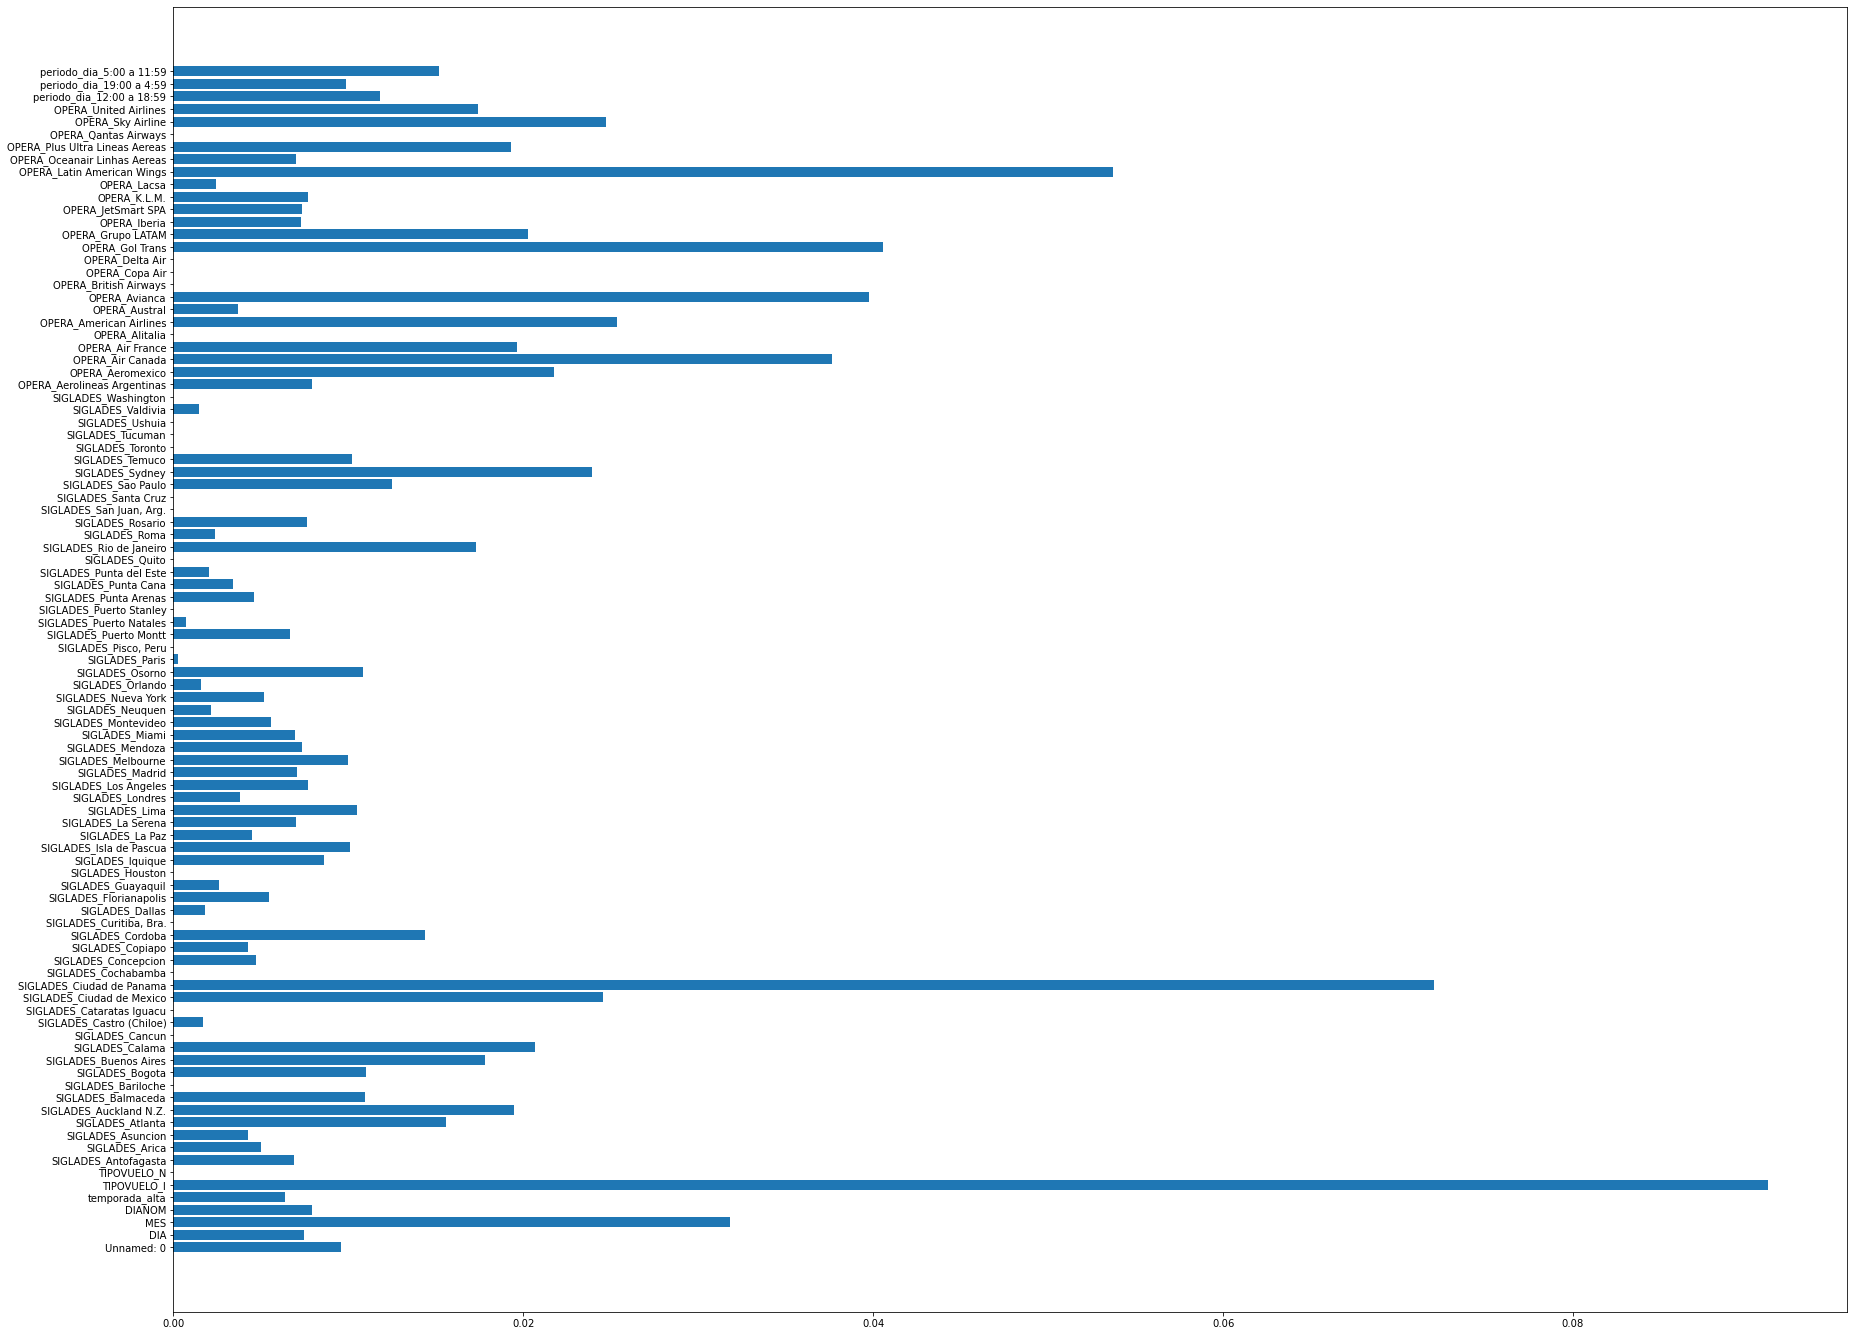

In [196]:
# Feature Importance

import matplotlib.pyplot as plt

plt.figure(figsize=(30,24))

fximportance = plt.barh(dataset_SCL_Features.columns, modelxgb.feature_importances_)

plt.savefig('fximportance.pdf')  


In [191]:
print(modelxgb.feature_importances_)


[0.0095898  0.00745026 0.03182751 0.00790446 0.00636513 0.09112237
 0.         0.00690754 0.00501725 0.00426335 0.01558779 0.01946227
 0.01092998 0.         0.01101324 0.0177869  0.02065247 0.
 0.00169976 0.         0.02456734 0.07204694 0.         0.00471211
 0.00429256 0.01438016 0.         0.0018201  0.00549021 0.00263565
 0.         0.00862943 0.01010302 0.00448406 0.00702139 0.01050686
 0.00379239 0.00767736 0.00704058 0.00997404 0.00735556 0.00694023
 0.00559226 0.0021595  0.00517536 0.00155951 0.01084274 0.00025827
 0.         0.00668834 0.00071781 0.         0.00460098 0.00338903
 0.00202982 0.         0.01730688 0.00238466 0.00764512 0.
 0.         0.01248715 0.02392665 0.01022041 0.         0.
 0.         0.00145486 0.         0.00792211 0.0217385  0.03765302
 0.01961662 0.         0.02538445 0.00370235 0.03978431 0.
 0.         0.         0.04054645 0.02025691 0.0073088  0.00734958
 0.00768268 0.00244228 0.0537291  0.00699497 0.01932688 0.
 0.02474787 0.01741652 0.01183647 0

En cuanto a la feature importance del modelo XGBOOST sin ponderaciones, la hipótesis de que la variable más importante sería los vuelos internacionales es confirmada, ya que es la variable más importante para la predicción de atrasos, como es posible ver en la figura anterior. Además, otras variables importantes para el análisis del modelo fueron si es que el destino del vuelo era la ciudad de Panamá, y si la aerolínea a cargo del vuelo era Latin American Wings.

Por último, para mejorar la perfomance del modelo se podría incurrir en una mayor modificación de los hiperparámetros, como también incrementando la cantidad de observaciones y optimizar de mejor manera la curva de aprendizaje del algorítmo. Además, podría incrementarse la performance del modelo mediante un feature engineering con mayor precisión, para así obtener la mayor cantidad de insight posible de las variables explicativas y dependiente. 

Para una futura aplicación del modelo, sería interesante poder hacer un filtro de los features a utilizar, considerando que hubieron features que obtuvieron un 0 en cuanto a su importancia, mediante técnicas de reducción de dimensionalidad. Con ello, se podría aplicar un PCA para obtener un espacio dimensional de variables menor, y con ello aumentar la precisión del modelo.

### Referencias

- Cheevachaipimol et al. (2020) Flight Delay Prediction Using a Hybrid Deep Learning Method. Engineering Journal.

- Kalyani et al. (2020) Machine Learning Model - based Prediction of Flight Delay. Proceedings of the Fourth International Conference on I-SMAC (IoT in Social, Mobile, Analytics and Cloud) (I-SMAC).

- Shi, R & Xu, X. (2021) A Train Arrival Delay Prediction model using XGBoost and Bayesian Optimization. University of Prince Edward Island

- Tang, Y. (2021) Airline Flight Delay Prediction Using Machine Learning Models. Association for Computing Machinery.

 